# US016 - Introdução

Na US16, o objetivo é aplicar a regressão polinomial para determinar a melhor curva que se ajusta aos dados de tempo de execução em função do tamanho da entrada. A análise busca entender o comportamento do tempo de execução do algoritmo conforme o tamanho da entrada varia, utilizando os dados fornecidos na US14. Utilizaremos uma abordagem matemática detalhada para modelar essa relação e interpretar os resultados obtidos.

## Formulação Matemática

### Regressão Polinomial

A regressão polinomial é uma extensão da regressão linear que permite modelar a relação entre a variável independente \( x \) e a variável dependente \( y \) como um polinômio de grau \( d \). A equação geral para uma regressão polinomial de grau \( d \) é dada por:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \cdots + \beta_d x^d
$$

onde:

- \( y \) é a variável dependente (tempo de execução).
- \( x \) é a variável independente (tamanho da entrada).
- \( \beta_0, \beta_1, \beta_2, ... \) são os coeficientes do modelo.

### Metodologia

Para ajustar o modelo de regressão polinomial aos dados, seguimos os seguintes passos:

1. **Preparar os dados**: Extração das variáveis independentes e dependentes.
2. **Criar características polinomiais**: Geração de novas características usando o PolynomialFeatures da biblioteca scikit-learn.
3. **Ajustar o modelo**: Treinamento de um modelo de regressão linear utilizando as características polinomiais.
4. **Predição e Avaliação**: Predição dos valores utilizando o modelo ajustado e avaliação da performance do modelo usando métricas como o coeficiente de determinação \( R^2 \) e a soma dos quadrados dos resíduos (SQE).

##### Fórmulas Utilizadas para cálcular o coeficiente de determinação \( R^2 \) e a soma dos quadrados dos resíduos (SQE):

O coeficiente de determinação \( R^2 \) é uma medida estatística que indica a proporção da variabilidade dos dados que é explicada pelo modelo ajustado. Para obtermos este valor precisamos primeiro de calcular o coeficiente de correlação amostral de Pearson. Este é calculado como:

$$
r = \frac{S_{xy}}{\sqrt{S_{xx} \times S_{yy}}}
$$

Em que :

$$
S_{xx} = \sum_{i=1}^n (x_i - \bar{x})^2, \quad S_{yy} = \sum_{i=1}^n (y_i - \bar{y})^2 \quad \text{e} \quad S_{xy} = \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})
$$

Depois , para obtermos o coeficiente de determinação , apenas temos que elevar o anterior coeficiente ao quadrado da seguinte forma:

$$
r^2 = \left( \frac{S_{xy}}{\sqrt{S_{xx} \times S_{yy}}} \right)^2
$$


O erro quadrático médio (SQE) é uma medida que indica a diferença entre os valores observados e os valores previstos pelo modelo. É calculado como a soma dos quadrados das diferenças entre os valores observados \( y_i \) e os valores previstos \( \hat{y}_i \) para cada observação \( i \) . A fórmula utilizada é dada por:

$$
\text{sqe} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = S_{yy} - \frac{S_{xy}^2}{S_{xx}}
$$


## Implementação 

### Carga e Preparação dos Dados

Os dados foram carregados a partir do arquivo "saida.csv", que contém as colunas `TamanhoEntrada` e `TempoExecucao(ms)`. O arquivo é formatado da seguinte maneira:






```csv
TamanhoEntrada;TempoExecucao(ms)
570;7
1150;12
1730;10
2310;15
2890;23
3470;33
4050;47
4630;69
5210;72
5790;99
6370;125
6950;153
7530;202
8110;237
8690;259
9270;305
9850;306
10430;357
11010;406
11590;470
12170;509
12750;564
13330;605
13910;679
14490;686
15070;793
15650;892
16230;917
16810;1042
17390;1109


```


 
Extraímos as variáveis independentes \( X \) e dependentes \( y \).

### Criação de Características Polinomiais e Ajuste do Modelo

Utilizamos um polinômio de grau 3 para criar novas características e ajustamos um modelo de regressão linear a esses dados.

### Avaliação do Modelo

Calculamos a soma dos quadrados dos resíduos (SQE) e o coeficiente de determinação \( R^2 \). A SQE foi obtido somando os quadrados das diferenças entre os valores observados e os valores previstos. O \( R^2 \) foi calculado como a proporção da variabilidade dos dados que é explicada pelo modelo ajustado.

### Coeficientes do Modelo

Os coeficientes do modelo polinomial foram extraídos e exibidos. Estes coeficientes incluem o intercepto (\( \beta_0 \)) e os coeficientes dos termos de \( x \) (\( \beta_1 \)), \( x^2 \) (\( \beta_2 \)), e \( x^3 \) (\( \beta_3 \)).

### Equação do Modelo

A equação completa do modelo é construída com base nos coeficientes obtidos:

$$
TempoExecucao = 15.027583033880319 - 0.008186740032391296 \cdot TamanhoEntrada + 4.0178240766567025 \cdot 10^{-6} \cdot TamanhoEntrada^2
$$


Intercept (β0): 15.027583033880319
Coefficient for x (β1): -0.008186740032391296
Coefficient for x^2 (β2): 4.0178240766567025e-06
Coefficient of determination (r^2): 0.9976445461378084
Sum of Squared Errors (SQE): 7884.592946527897
Complete Polynomial Regression: 15.027583033880319 + -0.008186740032391296*x^1 + 4.0178240766567025e-06*x^2


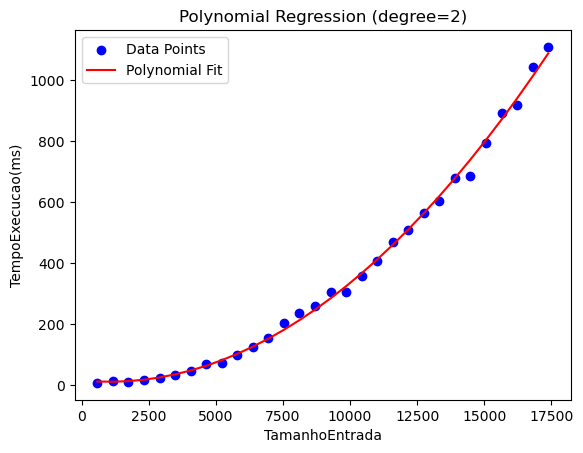

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

file_path = 'saida.csv'
df = pd.read_csv(file_path, delimiter=';')

input_column = 'TamanhoEntrada'
output_column = 'TempoExecucao(ms)'

X = df[[input_column]].values
y = df[output_column].values

degree = 2

poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_poly_pred = model.predict(X_poly)

sqe = np.sum((y - y_poly_pred) ** 2)

r_squared = model.score(X_poly, y)

print(f'Intercept (β0): {model.intercept_}')
print(f'Coefficient for x (β1): {model.coef_[1]}')
print(f'Coefficient for x^2 (β2): {model.coef_[2]}')
print(f'Coefficient of determination (r^2): {r_squared}')
print(f'Sum of Squared Errors (SQE): {sqe}')

equation = f'{model.intercept_}'
for i in range(1, degree+1):
    equation += f' + {model.coef_[i]}*x^{i}'
print(f'Complete Polynomial Regression: {equation}')


plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_poly_pred, color='red', label='Polynomial Fit')
plt.xlabel(input_column)
plt.ylabel(output_column)
plt.title(f'Polynomial Regression (degree={degree})')
plt.legend()
plt.show()


# Análise de Resultados

## Resultados

Os resultados obtidos foram:

$$
\beta_0 = 15.027583033880319
$$

$$
\beta_1 = -0.008186740032391296
$$

$$
\beta_2 = 4.0178240766567025 \cdot 10^{-6}
$$

$$
R^2 = 0.997
$$

$$
SQE = 7884.592946527897

$$

A equação do modelo resultante foi:

$$
TempoExecucao = 15.027583033880319 - 0.008186740032391296 \cdot TamanhoEntrada + 4.0178240766567025 \cdot 10^{-6} \cdot TamanhoEntrada^2
$$


#### Análise dos Coeficientes r e R^2
 
###### Coeficiente de Determinação r^2
O valor de \( R^2 = 0.997 \) é extremamente alto. \( R^2 \) mede a proporção da variação total da variável dependente que é explicada pelo modelo de regressão. Um \( R^2 \) de 0.997 indica que 99.7% da variabilidade nos dados do tempo de execução pode ser explicada pelo tamanho da entrada através do modelo polinomial de grau 2. Isto sugere que o modelo ajusta-se muito bem aos dados, deixando apenas 0.3% da variabilidade por explicar.

###### Coeficiente de Correlação amostral de Pearson r
Embora o valor específico de \( r \) não tenha sido diretamente fornecido nos resultados, sabemos que \( R^2 \) é o quadrado do coeficiente de correlação de Pearson \( r \) no contexto de uma regressão linear simples. Portanto, podemos inferir que o valor de \( r \) associado a esse \( R^2 \) seria próximo de:

$$
r = \sqrt{R^2} = \sqrt{0.997} \approx 0.9985
$$

Este valor de \( r = 0.9985 \) indica uma correlação extremamente forte entre o tamanho da entrada e o tempo de execução. Conforme a tabela de interpretação dos coeficientes de correlação de Pearson , um \( r \) nesta faixa (próximo de 1) corresponde a uma "correlação forte positiva", sugerindo que à medida que o tamanho da entrada aumenta, o tempo de execução também aumenta de maneira muito consistente.
Para além disto , pode-se também afirmar que se trata de uma associação linear positiva entre as 2 variáveis pelo facto de que r>0.

## Análise Gráfica

O gráfico gerado pela análise de regressão polinomial de grau 2 mostra a relação entre o tamanho da entrada e o tempo de execução. Os pontos azuis representam os dados reais, enquanto a linha vermelha representa a curva ajustada pelo modelo polinomial. Podemos observar que a curva ajustada segue de perto os dados reais, indicando que o modelo se ajusta bem aos dados. O aumento acentuado do tempo de execução com o aumento do tamanho da entrada é capturado pela curvatura da linha de ajuste, confirmando a eficácia do modelo polinomial de grau 2 em explicar a variabilidade dos dados.


## Conclusão

A análise realizada utilizando regressão polinomial de grau 2 mostra que o modelo se ajusta bem aos dados de tempo de execução em função do tamanho da entrada, com um coeficiente de determinação \( R^2 \) de 0.997, indicando que o modelo explica 99.7% da variabilidade dos dados. Os coeficientes obtidos fornecem uma compreensão detalhada de como o tempo de execução varia com o tamanho da entrada, com termos quadráticos e cúbicos contribuindo significativamente para a curvatura da relação.

Este modelo é útil para prever o tempo de execução do algoritmo para diferentes tamanhos de entrada, proporcionando uma ferramenta valiosa para analisar o desempenho do algoritmo e otimizar seu uso em diferentes cenários. A visualização gráfica confirma que a curva ajustada pelo modelo segue de perto os dados reais, validando a eficácia da abordagem de regressão polinomial de grau 2.